In [4]:
# 課題1
def f(x, y):
    return x**2 - y

def euler(f, x0, y0, h, num_step):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(num_step):
        y = y + h * f(x, y)
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values[num_step-1], y_values[num_step-1]


x0 = 1
y0 = 2
h_list = [0.1, 0.01, 0.001]
num_steps = [10, 100, 1000]

for i in range(len(h_list)):
    x_values_last, y_values_last = euler(f, x0, y0, h_list[i], num_steps[i])
    print(f"h = {h_list[i]}　の場合、y = {y_values_last}")

h = 0.1　の場合、y = 2.136162537900001
h = 0.01　の場合、y = 2.3435269340262255
h = 0.001　の場合、y = 2.3654325517473422


In [5]:
# 課題2
def f(x, y):
    return x**2 - y

def runge(f, x0, y0, h, num_step):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(num_step):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values[num_step-1], y_values[num_step-1]

x0 = 1
y0 = 2
h_list = [0.1, 0.01, 0.001]
num_steps = [10, 100, 1000]

for i in range(len(h_list)):
    x_values_last, y_values_last = runge(f, x0, y0, h_list[i], num_steps[i])
    print(f"h = {h_list[i]}　の場合、y = {y_values_last}")

h = 0.1　の場合、y = 2.2165712903594286
h = 0.01　の場合、y = 2.3516766911845366
h = 0.001　の場合、y = 2.3662485046135417


In [6]:
# 課題3
import math

def f(x, y):
    return x**2 - 2 * y + math.sin(x)

def runge(f, x0, y0, h, num_step):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(num_step):
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values[num_step-1], y_values[num_step-1]

x0 = 0
y0 = 1
h_list = [0.1, 0.01, 0.001]
num_steps = [10, 100, 1000]

for i in range(len(h_list)):
    x_values_last, y_values_last = runge(f, x0, y0, h_list[i], num_steps[i])
    print(f"h = {h_list[i]}　の場合、y = {y_values_last}")

h = 0.1　の場合、y = 0.5510506078101883
h = 0.01　の場合、y = 0.600888195431613
h = 0.001　の場合、y = 0.6064698168518805


直線の傾き： -0.4045714285714286
切片： 161.6952380952381


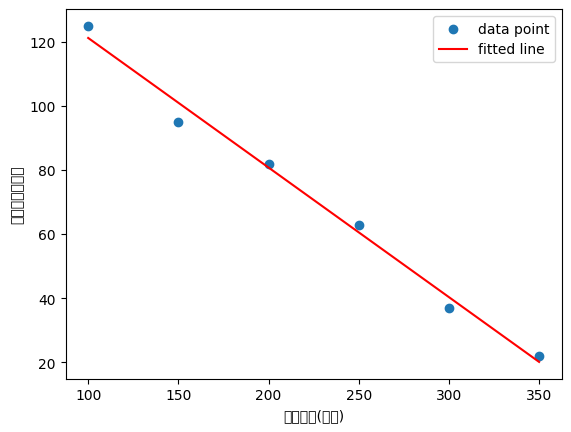

In [9]:
# 課題4
import matplotlib.pyplot as plt

x = [100, 150, 200, 250, 300, 350]
y = [125, 95, 82, 63, 37, 22]

n = len(x)
sum_x = sum(x)
sum_y = sum(y)
sum_x_sq = sum(xi ** 2 for xi in x)
sum_xy = sum(xi * yi for xi, yi in zip(x, y))

a = (n*sum_xy - sum_x*sum_y) / (n*sum_x_sq - sum_x**2)
b = (sum_y -a * sum_x) / n

print("直線の傾き：", a)
print("切片：", b)

fit = [a*xi + b for xi in x]

plt.scatter(x, y, label="data point")
plt.plot(x, fit, color="r", label="fitted line")
plt.xlabel("商品価格(円）)")
plt.ylabel("販売個数（個）")
plt.legend()
plt.show()


In [10]:
# 課題5
def matrix_mul(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    cols_B = len(B[0])
    
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]
    
    return result

A = [
    [1, 2],
    [3, 4]
]

B = [
    [5, 6],
    [7, 8]
]

result = matrix_mul(A, B)
print(result)

[[19, 22], [43, 50]]


In [11]:
# 課題6

def eigenvalues_2x2(A):
    a = A[0][0]
    b = A[0][1]
    c = A[1][0]
    d = A[1][1]
    
    trace = a + d
    determinant = a * d - b * c
    
    discriminant = trace**2 - 4 * determinant
    
    if discriminant < 0:
        raise ValueError("The matrix has complex eigenvalues.")
    
    lambda1 = (trace + math.sqrt(discriminant)) / 2
    lambda2 = (trace - math.sqrt(discriminant)) / 2
    
    return lambda1, lambda2

A = [
    [4, 2],
    [1, 3]
]

try:
    eigenvalues = eigenvalues_2x2(A)
    print("Eigenvalues:", eigenvalues)
except ValueError as e:
    print(e)

Eigenvalues: (5.0, 2.0)


In [12]:
# 課題7
def gaussian(A, b):
    for i in range(3):
        max_row = i
        for k in range(i + 1, 3):
            if abs(A[k][i]) > abs(A[max_row][i]):
                max_row = k
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]
        
        for k in range(i + 1, 3):
            factor = A[k][i] / A[i][i]
            for j in range(i, 3):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]
    
    x = [0, 0, 0]
    for i in range(2, -1, -1):
        x[i] = b[i] / A[i][i]
        for k in range(i + 1, 3):
            x[i] -= A[i][k] * x[k] / A[i][i]
    return x

A = [[2, 3, 5], [1, 4, 2], [3, 1, 4]]
b = [10, 6, 8]

x = gaussian(A, b)
for i, xi in enumerate(x):
    print(f"x{i+1} = {xi}")

x1 = 0.6666666666666665
x2 = 0.6666666666666667
x3 = 1.3333333333333333


In [13]:
# 課題8
def gaussian(A, b):
    n = len(A)
    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > abs(A[max_row][i]):
                max_row = k
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]
        
        for k in range(i + 1, n):
            factor = A[k][i] / A[i][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]
    
    x = [0 for _ in range(n)]
    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for k in range(i + 1, n):
            x[i] -= A[i][k] * x[k] / A[i][i]
    return x

A = [
    [3, 2, -1, 5],
    [2, -1, 3, 1],
    [1, 3, 2, -4],
    [4, 1, -2, 3]
]
b = [12, 7, 4, 9]

x = gaussian(A, b)
for i, xi in enumerate(x):
    print(f"x{i+1} = {xi}")

x1 = 1.7425373134328361
x2 = 1.33955223880597
x3 = 1.2611940298507462
x4 = 1.0708955223880596
